In [1]:
!pip install geopandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.cm as cm
import geopandas as gpd


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


### Loading the data and initial exploration

In [2]:
children_registered = pd.read_csv('/Users/mel/Desktop/group_project_m_r/UK Education provision under 5s/data/2_early_years_provision_provider_type_2018_2024.csv')
disadvanted_data = pd.read_csv('/Users/mel/Desktop/group_project_m_r/UK Education provision under 5s/data/3_early_years_provision_disadvantaged_children_2018_2024.csv')

In [3]:
def display_unique_vals(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f' Column: {column}')
        print(f'Number of unique values: {len(unique_values)}')
        print(f'Unique values: {unique_values}')
        print('-' * 40)


In [4]:
display_unique_vals(children_registered)

 Column: time_period
Number of unique values: 7
Unique values: [2024 2023 2022 2021 2020 2019 2018]
----------------------------------------
 Column: time_identifier
Number of unique values: 1
Unique values: ['Reporting year']
----------------------------------------
 Column: geographic_level
Number of unique values: 3
Unique values: ['National' 'Regional' 'Local authority']
----------------------------------------
 Column: country_code
Number of unique values: 1
Unique values: ['E92000001']
----------------------------------------
 Column: country_name
Number of unique values: 1
Unique values: ['England']
----------------------------------------
 Column: region_code
Number of unique values: 12
Unique values: [nan 'E12000001' 'E12000002' 'E12000003' 'E12000004' 'E12000005'
 'E12000006' 'E12000007' 'E12000008' 'E12000009' 'E13000001' 'E13000002']
----------------------------------------
 Column: region_name
Number of unique values: 12
Unique values: [nan 'North East' 'North West' 'Yorks

In [5]:
disadvanted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82584 entries, 0 to 82583
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_period          82584 non-null  int64  
 1   time_identifier      82584 non-null  object 
 2   geographic_level     82584 non-null  object 
 3   country_code         82584 non-null  object 
 4   country_name         82584 non-null  object 
 5   region_code          82080 non-null  object 
 6   region_name          82080 non-null  object 
 7   old_la_code          76536 non-null  float64
 8   new_la_code          76536 non-null  object 
 9   la_name              76536 non-null  object 
 10  entitlement_type     82584 non-null  object 
 11  age                  82584 non-null  object 
 12  year_group           82584 non-null  object 
 13  disadvantage_type    82584 non-null  object 
 14  basis_for_funding    82584 non-null  object 
 15  number_children      82584 non-null 

In [6]:
display_unique_vals(disadvanted_data)

 Column: time_period
Number of unique values: 7
Unique values: [2024 2023 2022 2021 2020 2019 2018]
----------------------------------------
 Column: time_identifier
Number of unique values: 1
Unique values: ['Reporting year']
----------------------------------------
 Column: geographic_level
Number of unique values: 3
Unique values: ['National' 'Regional' 'Local authority']
----------------------------------------
 Column: country_code
Number of unique values: 1
Unique values: ['E92000001']
----------------------------------------
 Column: country_name
Number of unique values: 1
Unique values: ['England']
----------------------------------------
 Column: region_code
Number of unique values: 12
Unique values: [nan 'E12000001' 'E12000002' 'E12000003' 'E12000004' 'E12000005'
 'E12000006' 'E12000007' 'E12000008' 'E12000009' 'E13000001' 'E13000002']
----------------------------------------
 Column: region_name
Number of unique values: 12
Unique values: [nan 'North East' 'North West' 'Yorks

## Filtering out 2-year-olds on children_registered df

In [7]:
def filter_out_age(df):
    """
    Removes rows where the column 'age' is equal to '2-year-olds' from a dataframe.

    Parameters:
    df: The DataFrame to modify

    Returns:
    pandas.DataFrame: The modified DataFrame with rows removed. 
    """
    if 'age' in df.columns:
        return df[df['age']!= '2-year-olds'].reset_index(drop=True)
    


In [8]:
# Checks the count of '2-year-olds' before filtering
print(f"Before filtering, count of '2-year-olds': {(children_registered['age'] == '2-year-olds').sum()}")

# Applies the filter and reassign the DataFrame
children_registered = filter_out_age(children_registered)

# Checks the count of '2-year-olds' after filtering
print(f"After filtering, count of '2-year-olds': {(children_registered['age'] == '2-year-olds').sum()}")


Before filtering, count of '2-year-olds': 45880
After filtering, count of '2-year-olds': 0


## Filtering out 2-year-olds on disadvanted_data df

In [9]:
# Checks the count of '2-year-olds' before filtering
print(f"Before filtering, count of '2-year-olds': {(disadvanted_data['age'] == '2-year-olds').sum()}")

# Applies the filter and reassign the DataFrame
disadvanted_data = filter_out_age(disadvanted_data)

# Checks the count of '2-year-olds' after filtering
print(f"After filtering, count of '2-year-olds': {(children_registered['age'] == '2-year-olds').sum()}")


Before filtering, count of '2-year-olds': 27528
After filtering, count of '2-year-olds': 0


## Counting invalid rows after removal of 2-year-olds

In [10]:
invalid_values = ['c', 'u', 'x', 'z']

def count_invalid_rows(df, column, invalid_values):
    """
    Counts the number of rows with invalid values in a specified column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check.
    column (str): The column to check for invalid values.
    invalid_values (list): A list of invalid values to search for.

    Returns:
    int: The count of rows with invalid values.
    """
    if 'is_invalid' in df.columns:
              df.drop(columns=['is_invalid'], inplace = True)
    df['is_invalid'] = df[column].isin(invalid_values)
       
    invalid_count = df['is_invalid'].sum()

    return invalid_count
       


In [11]:
count_invalid_rows(children_registered,'number_children',invalid_values)

np.int64(18352)

In [12]:
count_invalid_rows(disadvanted_data,'number_children',invalid_values)

np.int64(22151)

### Creating a new DataFrame for the totals

In [13]:
keep_total = children_registered[children_registered["year_group"] == 'Total']
keep_total = keep_total.dropna(subset=['new_la_code']).reset_index(drop =True)

### Removing 'Total' from DF

In [14]:
children_registered_columns_check = ['age', 'year_group','provider_type', 'provider_type_group']
disadvantaged_columns_check = ['age', 'year_group','disadvantage_type', 'basis_for_funding']

def remove_rows_with_total(df, columns_to_check):
    """
    Removes rows containing the value 'total' in specified columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    columns_to_check (list): List of column names to check for the value 'total'.

    Returns:
    pandas.DataFrame: The cleaned DataFrame with rows containing 'total' removed.
    """
    indices_to_remove = []

    for idx, row in df.iterrows():
        for column in columns_to_check:
            if str(row[column]) == 'Total':
              indices_to_remove.append(idx)
              break
    df = df.drop(indices_to_remove).reset_index(drop=True)

    return df

In [15]:
children_registered = remove_rows_with_total(children_registered, children_registered_columns_check)
disadvanted_data = remove_rows_with_total(disadvanted_data, disadvantaged_columns_check)

### Replacing 'z' with NaN

In [16]:
children_registered[['number_children', 'number_providers']] = (children_registered[['number_children', 'number_providers']].replace('z', np.nan))

In [17]:
children_registered[['number_children', 'number_providers']] = children_registered[['number_children', 'number_providers']].astype(float)

In [18]:
# Disadvantaged had more invalid values than children_registered
disadvanted_data[['number_children', 'percentage_children']] = (
    disadvanted_data[['number_children', 'percentage_children']].replace(['z','c','u','low'],np.nan)
    .astype(float))

### Removing rows where la code is NaN, this prevents double dipping numbers at national/regional levels


In [19]:
children_registered = children_registered.dropna(subset=['new_la_code']).reset_index(drop =True)
disadvanted_data = disadvanted_data.dropna(subset=['new_la_code']).reset_index(drop=True)

Changing timeperiod from int to datetime

In [20]:
children_registered['time_period'] = pd.to_datetime(children_registered['time_period'], format = '%Y') 
disadvanted_data['time_period'] = pd.to_datetime(disadvanted_data['time_period'], format = '%Y') 

In [23]:
children_registered['time_period'] = children_registered['time_period'].dt.year
disadvanted_data['time_period'] = disadvanted_data['time_period'].dt.year

In [24]:
children_registered = children_registered.drop(columns='is_invalid')
disadvanted_data = disadvanted_data.drop(columns='is_invalid')

## Checking for duplicates


In [25]:
duplicates = disadvanted_data[disadvanted_data.duplicated()]

print(f'Number of duplicate rows: {duplicates.shape[0]}')

Number of duplicate rows: 0


### Importing Rachel's joined file

In [27]:
joined_tables = pd.read_csv('/Users/mel/Desktop/group_project_m_r/joined1_3_4_15_hours.csv')

In [28]:
# Filtering for only 3 & 4 year olds
joined_tables = joined_tables[joined_tables['age'] == '3 and 4-year-olds']

# Filtering for only the columns I need
joined_tables_filtered = joined_tables[['time_period','region_name','number_children_dis','number_children']]

# Filtering for only rows where number_children_dis isn't NaN
joined_tables_filtered = joined_tables_filtered[joined_tables_filtered['number_children_dis'].notna()]

# Aggregating regions and years
joined_tables_filtered = joined_tables_filtered.groupby(['time_period','region_name'], as_index=False).agg(
    {'number_children_dis':'sum',
     'number_children': 'sum'})

# Renaming columns for clarity
joined_tables_filtered = joined_tables_filtered.rename(columns=
                                                       {'number_children':'total_registered_children',
                                                       'number_children_dis': 'dis_registered'})

In [29]:
joined_tables_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time_period                70 non-null     object 
 1   region_name                70 non-null     object 
 2   dis_registered             70 non-null     float64
 3   total_registered_children  70 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


###  Question 1: What proportion of kids on 15 hours receive additional funding?


In [30]:
joined_tables_filtered['time_period'] = pd.to_datetime(joined_tables_filtered['time_period'], format = '%Y-%m-%d') 
joined_tables_filtered['time_period'] = joined_tables_filtered['time_period'].dt.year

agg_data = joined_tables_filtered.groupby('time_period', as_index=False).sum()
agg_data['percentage_disadvantaged'] = (agg_data['dis_registered'] / agg_data['total_registered_children']) * 100



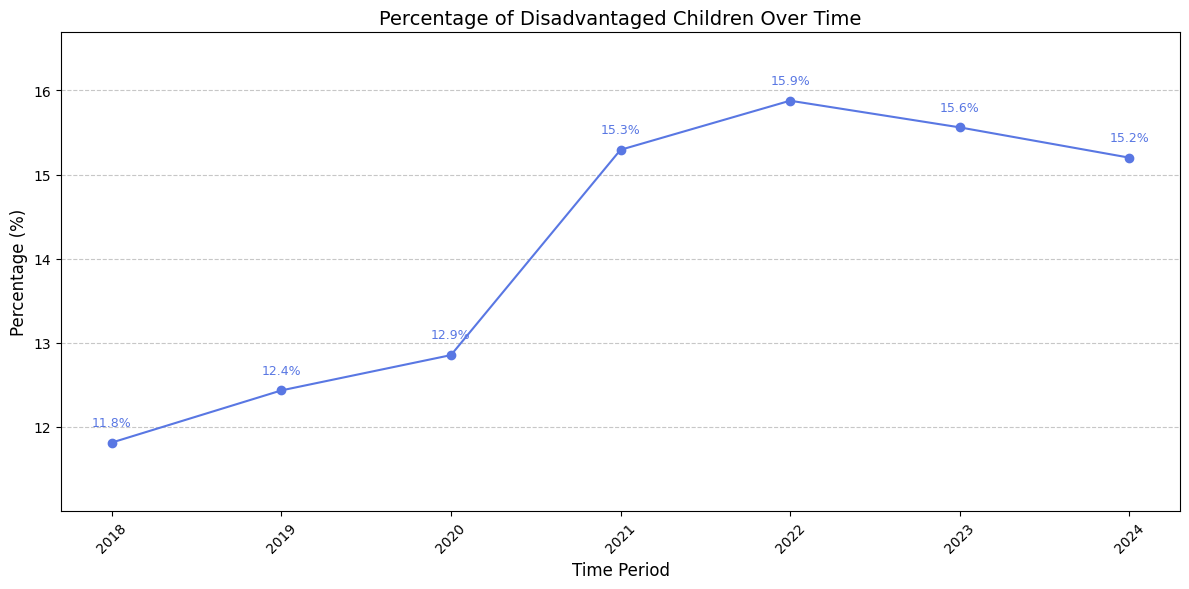

In [31]:
line_color = cm.coolwarm(0.1) 

plt.figure(figsize=(12, 6))
plt.plot(agg_data['time_period'], agg_data['percentage_disadvantaged'], marker='o',linestyle='-',color=line_color,label='Disadvantaged (%)')

plt.title('Percentage of Disadvantaged Children Over Time', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)


# This is to show the percentages on the graph.
# Show the percentages on the graph, and match the text color to the line color
for x, y in zip(agg_data['time_period'], agg_data['percentage_disadvantaged']):
    plt.text(x, y + 0.2, f"{y:.1f}%", ha='center', fontsize=9, color=line_color)


plt.margins(y=0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Question 2: What is the breakdown of additional funding types among disadvantaged groups?

In [32]:
only_applicable = disadvanted_data[disadvanted_data['disadvantage_type'] == 'Early years pupil premium']

funding_types = only_applicable.groupby('basis_for_funding', as_index=False)['number_children'].sum()

funding_types['percent'] = ((funding_types['number_children']) / (funding_types['number_children'].sum()))* 100



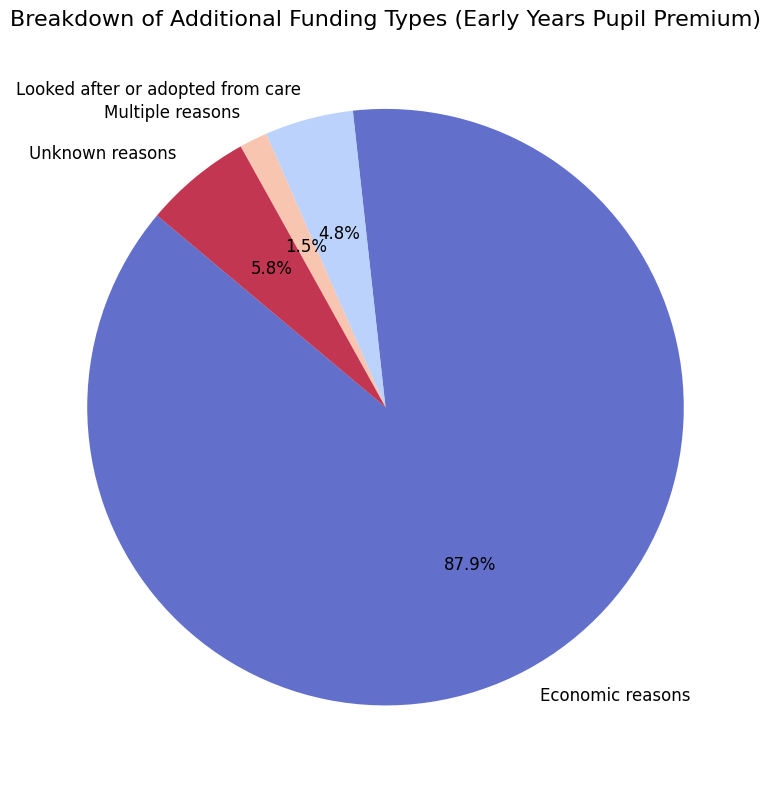

In [33]:
#I filtered for percent greater than 0 because SEN was showing on the pie.
non_zero_funding = funding_types[funding_types['percent'] > 0]

# for evenly spaced colors from the coolwarm colormap
pie_colors = [cm.coolwarm(i) for i in np.linspace(0, 1, len(non_zero_funding))]

# Adjusted alpha (transparency) for each color
pie_colors_with_alpha = [(r, g, b, 0.8) for r, g, b, _ in pie_colors]

plt.figure(figsize=(10, 8)) 
plt.pie(
    non_zero_funding['percent'], 
    labels=non_zero_funding['basis_for_funding'], 
    autopct='%1.1f%%',  # Format for percentages
    startangle=140, 
    textprops={'fontsize': 12},  
    colors=pie_colors_with_alpha,
)

plt.title('Breakdown of Additional Funding Types (Early Years Pupil Premium)', fontsize=16)
plt.tight_layout()
plt.show()

### 4. Mapping regions

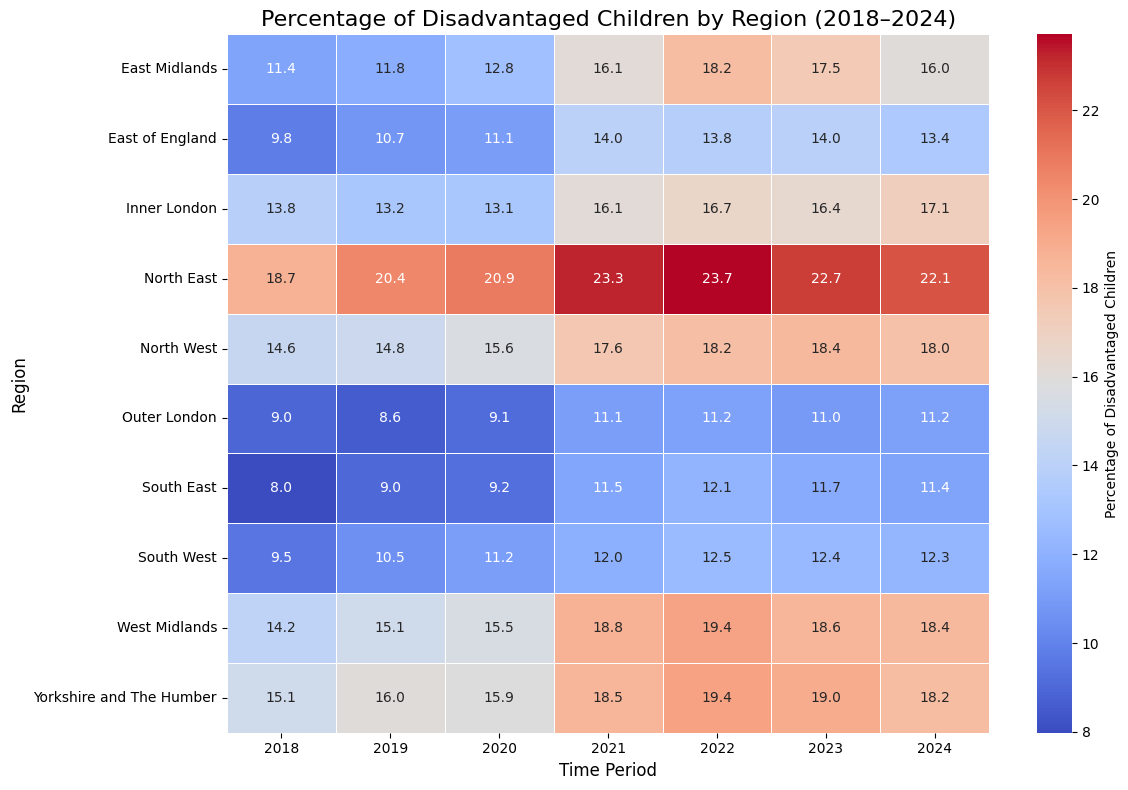

In [34]:
dis_regional_perc = joined_tables_filtered.groupby(['region_name','time_period'], as_index=False).sum([['dis_registered','total_registered_children']])
dis_regional_perc['percentage_disadvantaged'] = (dis_regional_perc['dis_registered'] / dis_regional_perc['total_registered_children']) * 100

# Pivot data for the heatmap so that regions are row indeces and years are columns and % are the values
heatmap_data = dis_regional_perc.pivot(index='region_name', columns='time_period', values='percentage_disadvantaged')

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".1f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Percentage of Disadvantaged Children'}
)

plt.title('Percentage of Disadvantaged Children by Region (2018–2024)', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()


New map with percentages

In [35]:
new_map = dis_regional_perc.copy()

new_map.loc[new_map['region_name'].isin(['Inner London','Outer London']), 'region_name'] = 'London'
new_map = new_map.groupby('region_name', as_index=False).mean(['dis_registered','total_registered_children','percentage_disadvantaged'])

In [36]:
geojson_path = '/Users/mel/Desktop/group_project_m_r/Regions_December_2023_Boundaries_EN_BUC_1958740832896680092.geojson'
regions = gpd.read_file(geojson_path)

# Here I changed the name on the gejson file to region name
regions.rename(columns={'RGN23NM': 'region_name'}, inplace=True)

merged = regions.merge(new_map, on='region_name')


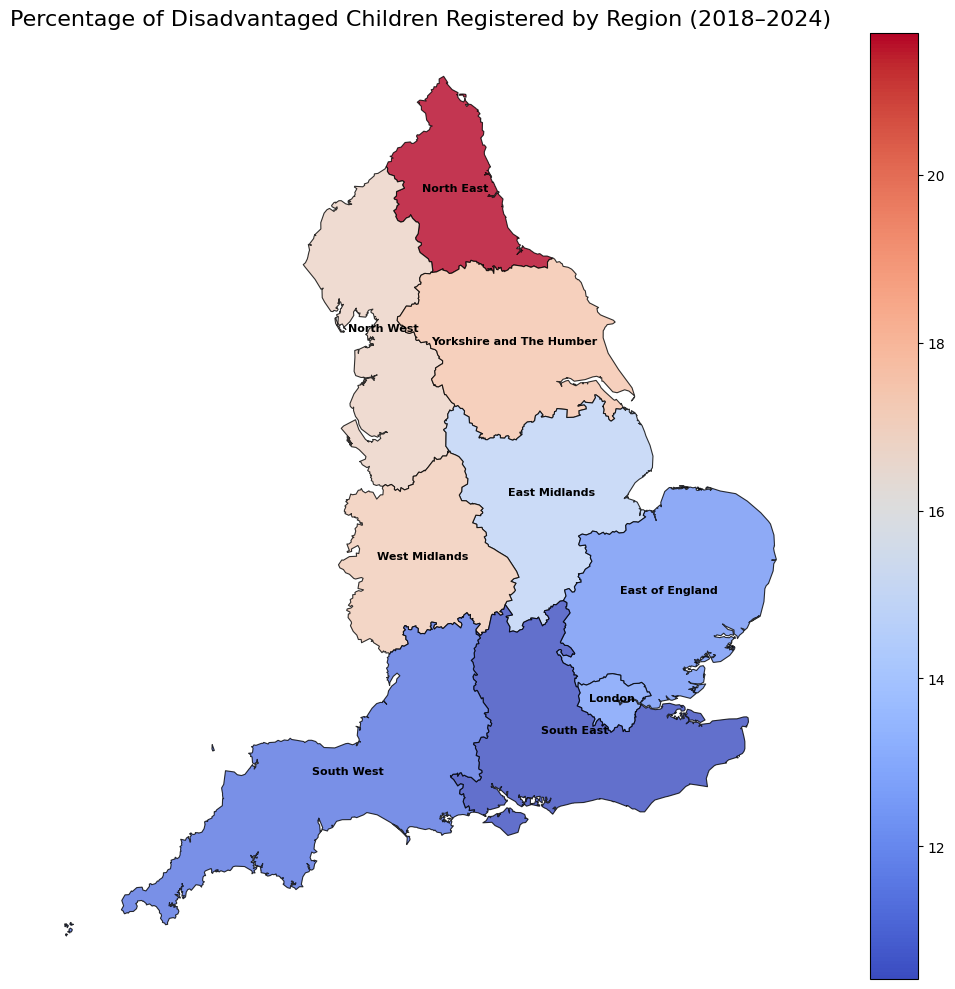

In [37]:
# This creates the space for the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

merged.plot(
    column='percentage_disadvantaged',
    cmap='coolwarm',
    legend=True,
    linewidth=0.8,
    alpha=0.8,
    edgecolor='black',
    ax=ax
)
# Add labels for each region at the center (centroid)
for _, row in merged.iterrows():
    # Get the centroid of each region
    centroid = row['geometry'].centroid
    # Add the text label at the centroid
    ax.text(
        centroid.x, centroid.y,  # X and Y coordinates of the centroid
        row['region_name'],      # Region name to display
        fontsize=8,              # Font size for the labels
        color='black',  
        fontweight='bold',         # Label color
        ha='center',              # Horizontal alignment
    )

plt.title('Percentage of Disadvantaged Children Registered by Region (2018–2024)', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# SEN Data

In [38]:
sen_data = pd.read_csv('/Users/mel/Desktop/group_project_m_r/sen.csv')

In [39]:
sen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time_period              6378 non-null   object 
 1   geographic_level         6378 non-null   object 
 2   region_code              6378 non-null   object 
 3   region_name              6378 non-null   object 
 4   new_la_code              6378 non-null   object 
 5   la_name                  6378 non-null   object 
 6   entitlement_type         6378 non-null   object 
 7   age                      6378 non-null   object 
 8   number_children_sen      6378 non-null   int64  
 9   percentage_children_sen  6378 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 498.4+ KB


In [40]:
display_unique_vals(sen_data)

 Column: time_period
Number of unique values: 7
Unique values: ['2024-01-01' '2023-01-01' '2022-01-01' '2021-01-01' '2020-01-01'
 '2019-01-01' '2018-01-01']
----------------------------------------
 Column: geographic_level
Number of unique values: 1
Unique values: ['Local authority']
----------------------------------------
 Column: region_code
Number of unique values: 10
Unique values: ['E12000001' 'E12000002' 'E12000003' 'E12000004' 'E12000005' 'E12000006'
 'E12000008' 'E12000009' 'E13000001' 'E13000002']
----------------------------------------
 Column: region_name
Number of unique values: 10
Unique values: ['North East' 'North West' 'Yorkshire and The Humber' 'East Midlands'
 'West Midlands' 'East of England' 'South East' 'South West'
 'Inner London' 'Outer London']
----------------------------------------
 Column: new_la_code
Number of unique values: 159
Unique values: ['E06000047' 'E06000005' 'E08000037' 'E06000001' 'E06000002' 'E08000021'
 'E08000022' 'E06000057' 'E06000003' 'E

In [41]:
sen_original = pd.read_csv('/Users/mel/Desktop/group_project_m_r/UK Education provision under 5s/data/4_early_years_provision_ethnicity_sen_2018_2024.csv')

In [42]:
sen_data = sen_data[sen_data['age']== '3 and 4-year-olds']

In [43]:

sen_data['time_period'] = pd.to_datetime(sen_data['time_period'], format='%Y-%m-%d')
sen_data['time_period'] = sen_data['time_period'].dt.year

sen_data.sample(5)

,time_period,geographic_level,region_code,region_name,new_la_code,la_name,entitlement_type,age,number_children_sen,percentage_children_sen
3152,2021,Local authority,E12000005,West Midlands,E06000020,Telford and Wrekin,15-hour entitlement,3 and 4-year-olds,345,8.3
6158,2018,Local authority,E12000009,South West,E06000025,South Gloucestershire,15-hour entitlement,3 and 4-year-olds,282,4.2
5669,2018,Local authority,E12000002,North West,E08000010,Wigan,30-hour entitlement,3 and 4-year-olds,25,1.0
1016,2023,Local authority,E12000002,North West,E06000049,Cheshire East,15-hour entitlement,3 and 4-year-olds,459,5.7
5351,2019,Local authority,E13000001,Inner London,E09000033,Westminster,30-hour entitlement,3 and 4-year-olds,16,4.7


In [44]:
yearly_sen = sen_data.groupby(['time_period'], as_index=False).sum(['number_children_sen','percentage_children_sen'])
yearly_sen.reset_index(drop=True, inplace=True)

In [45]:
sen_original = sen_original[sen_original['age']== '3 and 4-year-olds']

In [46]:
sen_data_new = sen_data[['time_period','region_name','entitlement_type','age','number_children_sen','percentage_children_sen']]

In [47]:
sen_data_new.reset_index(drop=True, inplace=True)

In [48]:
sen_entitlement_data = (
    sen_data_new.groupby(['time_period', 'entitlement_type'], as_index=False)
    .agg(
        total_children_with_sen=('number_children_sen', 'sum'),
        average_percentage_with_sen=('percentage_children_sen', 'mean')
    )
)

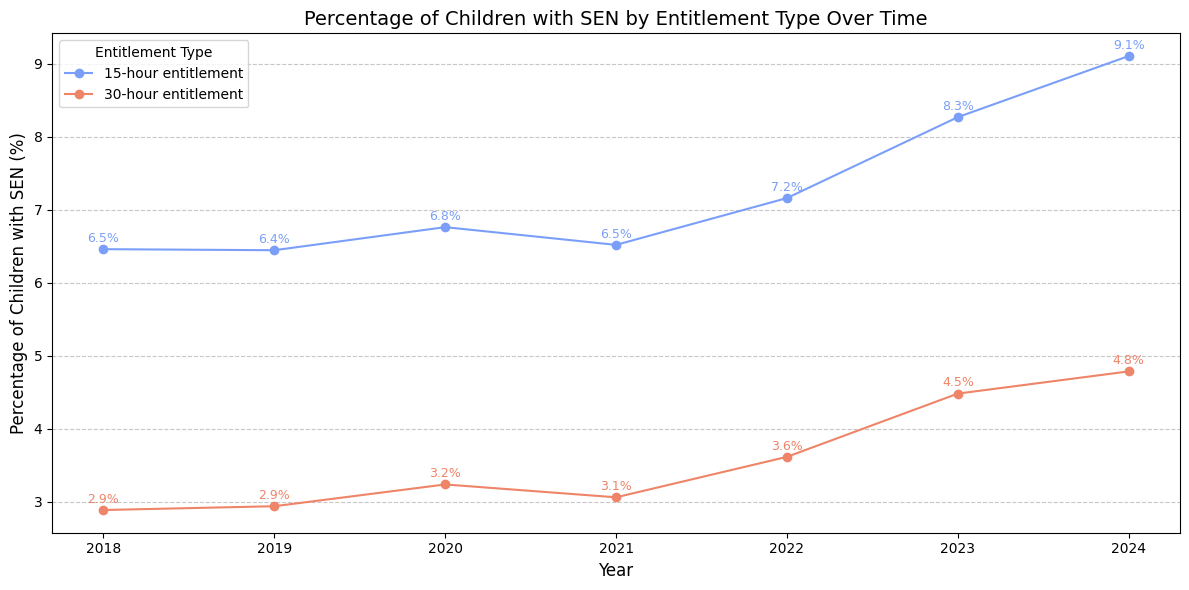

In [50]:


# Get the unique entitlement types and assign colors from coolwarm
unique_ent_types = sen_entitlement_data['entitlement_type'].unique()
colors = cm.coolwarm([0.2, 0.8])  # Chooses two distinct points on the coolwarm colormap so that they match rest of the graphs

plt.figure(figsize=(12, 6))

# Iterate through entitlement types and assign corresponding colors, basically just creates a line and assigns a color to 15hr and 30hr entitlement types.
# so what it does is iterates through each entitlement type(only 2 in this case), then creates a subset that only contains data for that entitlement type, assigns it a color and plots,
#Then it moves on to the next entitlement type and does the same. This way we end up with the 2 lines and distinct colors.
for i, ent_type in enumerate(unique_ent_types):
    subset = sen_entitlement_data[sen_entitlement_data['entitlement_type'] == ent_type]
    plt.plot(
        subset['time_period'], 
        subset['average_percentage_with_sen'], 
        marker='o', 
        linestyle='-', 
        label=ent_type, 
        color=colors[i]  # Assign color based on index
    )
      # Added this to display the % on top of each point and match the color to the line
    for x, y in zip(subset['time_period'], subset['average_percentage_with_sen']):
        plt.text(x, y + 0.1, f"{y:.1f}%", ha='center', fontsize=9, color=colors[i])

plt.title('Percentage of Children with SEN by Entitlement Type Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Children with SEN (%)', fontsize=12)
plt.legend(title='Entitlement Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


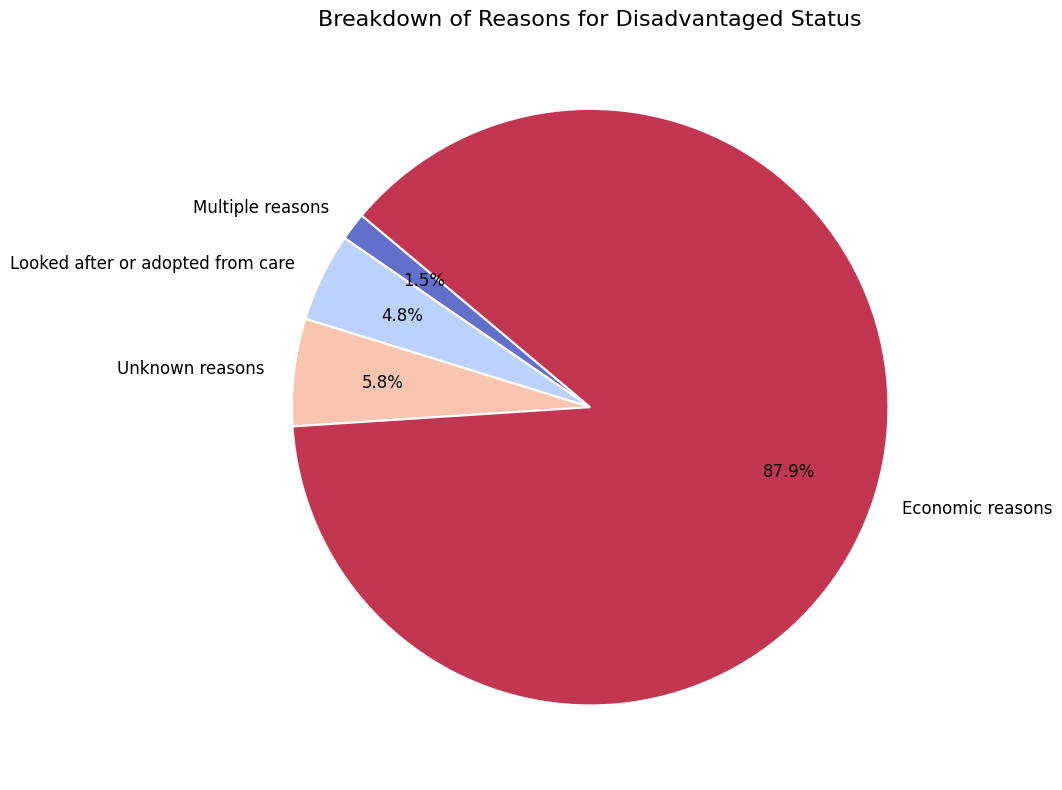

In [51]:
# Sorted the data by percentage to align colors properly
non_zero_funding_sorted = non_zero_funding.sort_values(by='percent', ascending=True)

# Chatgpt recommended this to choose the colors from the coolwarm colormap (blue for low values, red for high values) The [:3] is used to grab only RGB and then alpha is added in the next step.
pie_colors = [cm.coolwarm(i)[:3] for i in np.linspace(0, 1, len(non_zero_funding_sorted))]

# Adjusted alpha (transparency) for each color
pie_colors_with_alpha = [(r, g, b, 0.8) for r, g, b in pie_colors]

plt.figure(figsize=(10, 8)) 
plt.pie(
    non_zero_funding_sorted['percent'], 
    labels=non_zero_funding_sorted['basis_for_funding'], 
    autopct='%1.1f%%',  # Shows percentages inside the slices
    startangle=140, 
    textprops={'fontsize': 12},  # Font size for both labels and percentages
    colors=pie_colors_with_alpha,
    labeldistance=1.1,  # Distance between labels and the pie
    pctdistance=0.7,  # Distance of percentages from the center
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}  # Adds border around wedges
)

plt.title('Breakdown of Reasons for Disadvantaged Status', fontsize=16)
plt.tight_layout()
plt.show()
